In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Coursera.csv')
data

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Ecole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you will learn how to effective...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"Give me liberty, or give me death: Remembering...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,Megatrends heavily influence today's organisat...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


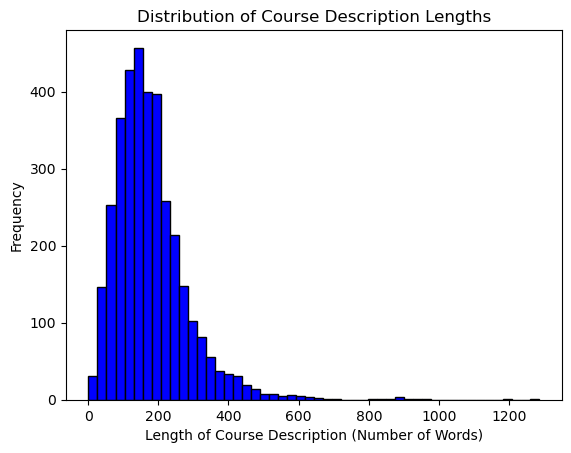

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

course_descriptions = data['Course Description'].values

description_lengths = [len(description.split()) for description in course_descriptions]

plt.hist(description_lengths, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Course Description Lengths')
plt.xlabel('Length of Course Description (Number of Words)')
plt.ylabel('Frequency')
plt.show()

# Below is the architecture of our neural net.

Autoencoder neural networks require embeddings extracting. Therefore, our neural network initializes a new sequential model and incorporates the first three layers of the trained model. These layers are then used to predict embeddings for the entire dataset tfidf-matrix after normalizing it. The result holds the lower-dimensional representations of the new data, encapsulating meaningful patterns learned by the initial model. This process is valuable for feature learning, where the extracted embeddings capture essential information about the input data's structure.

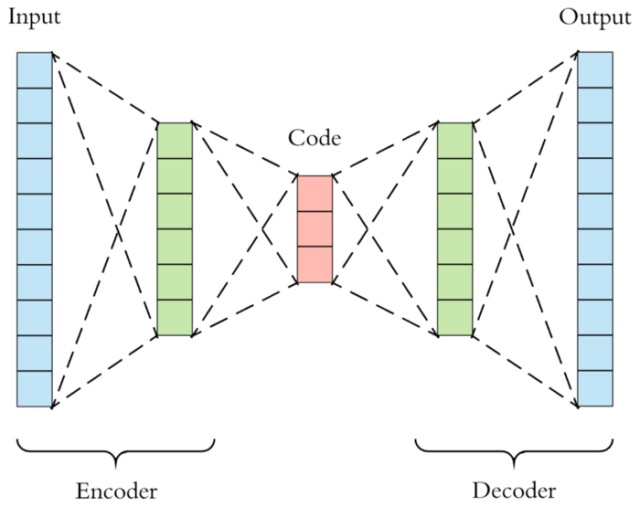

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics.pairwise import cosine_similarity

courses_data = pd.read_csv('Coursera.csv')

courses_data['combined_features'] = courses_data['Course Description'] + " " + courses_data['Skills']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(courses_data['combined_features'])

X_train, X_test = train_test_split(tfidf_matrix, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(X_train.shape[1], activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train.toarray(), X_train.toarray(), epochs=5, batch_size=128, validation_data=(X_test.toarray(), X_test.toarray()))

get_embeddings = Sequential()
get_embeddings.add(model.layers[0])
get_embeddings.add(model.layers[1])
get_embeddings.add(model.layers[2])
course_embeddings = get_embeddings.predict(normalize(tfidf_matrix.toarray()))

def recommend_course_by_index(index, courses_data, embeddings, top_n=5):
    if index < 0 or index >= len(courses_data):
        return "Invalid index."

    course_embedding = embeddings[index]
    similarities = cosine_similarity([course_embedding], embeddings)[0]
    similar_indices = np.argsort(similarities)[::-1][1:top_n+1]
    
    return courses_data['Course Name'].iloc[similar_indices].tolist()

index = 3  # index of course
recommended_courses = recommend_course_by_index(index, courses_data, course_embeddings)
print(recommended_courses)

Epoch 1/5
23/23 [==============================] - 1s 21ms/step - loss: 4.6931e-05 - val_loss: 4.6374e-05
Epoch 2/5
23/23 [==============================] - 0s 16ms/step - loss: 4.6318e-05 - val_loss: 4.6276e-05
Epoch 3/5
23/23 [==============================] - 0s 16ms/step - loss: 4.6291e-05 - val_loss: 4.6279e-05
Epoch 4/5
23/23 [==============================] - 0s 16ms/step - loss: 4.6301e-05 - val_loss: 4.6295e-05
Epoch 5/5
111/111 [==============================] - 0s 1ms/step
['Capstone Value Creation through Innovation', 'Introduction to OpenCL on FPGAs', 'Managing Employee Compensation', 'Customer Segmentation and Prospecting', 'Global Disease Masterclass: Communicable Diseases Epidemiology, Intervention and Prevention']


In [20]:
entry_at_index = courses_data.iloc[[3]]
entry_at_index

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,combined_features
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,"When it comes to numbers, there is always more..."


In [13]:
courses_data.shape

(3522, 8)

In [12]:
tfidf_matrix.shape

(3522, 20999)

In [19]:
X_train

<1x20999 sparse matrix of type '<class 'numpy.float64'>'
	with 71 stored elements in Compressed Sparse Row format>